In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import june_gloom
june_gloom.init()
june_gloom.noaa_clean()
june_gloom.feature_sst_anomaly()
from june_gloom import df_lax, df_enso_sst

In [3]:
# Copy df's for ease
df_lax_fog = df_lax[df_lax['FRSHTT']==100000]
df_lax_rain = df_lax[df_lax['FRSHTT']==10000]
df_lax_sun = df_lax[df_lax['FRSHTT']==0]

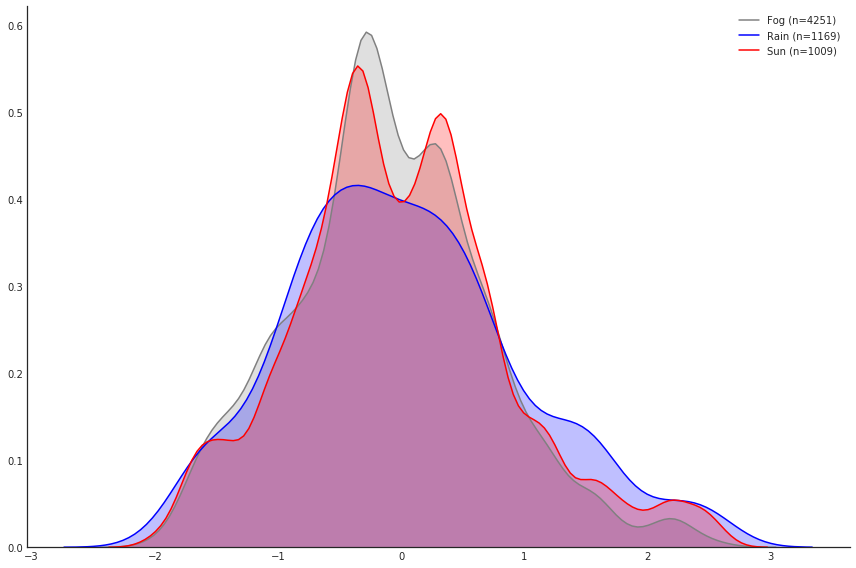

In [21]:
sns.set_style('white')
plt.figure(figsize=(12,8))

sns.kdeplot(df_lax_fog['sst_anomaly'].dropna(), color='grey', shade=True)
sns.kdeplot(df_lax_rain['sst_anomaly'].dropna(), color='blue', shade=True)
sns.kdeplot(df_lax_sun['sst_anomaly'].dropna(), color='red', shade=True)

sns.despine()
plt.tight_layout()
plt.legend(['Fog (n=4251)', 'Rain (n=1169)', 'Sun (n=1009)']);

In [5]:
df_lax_rain[df_lax_rain['PRCP']>1.0].head()

,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,month,year,dummy,sst_anomaly
3,1973-01-04,51.5,36.5,1013.6,1009.9,24.6,6.2,12.0,999.9,57.0,45.0,3.15,999.9,10000,1,1973,1,1.8
87,1973-03-29,57.1,36.8,1014.4,1010.8,31.5,11.4,20.0,25.8,63.0,50.0,5.12,999.9,10000,3,1973,1,0.5
117,1973-04-28,57.1,50.9,1013.1,1009.4,6.5,6.3,10.1,999.9,60.1,55.9,8.27,999.9,10000,4,1973,1,-0.1
702,1974-12-04,58.8,57.3,1012.3,1008.7,7.9,9.7,15.0,28.0,62.1,55.0,2.28,999.9,10000,12,1974,1,-0.6
1588,1977-05-08,57.3,51.7,1011.6,1007.9,18.4,9.3,20.0,28.9,62.1,51.1,1.57,999.9,10000,5,1977,1,0.2


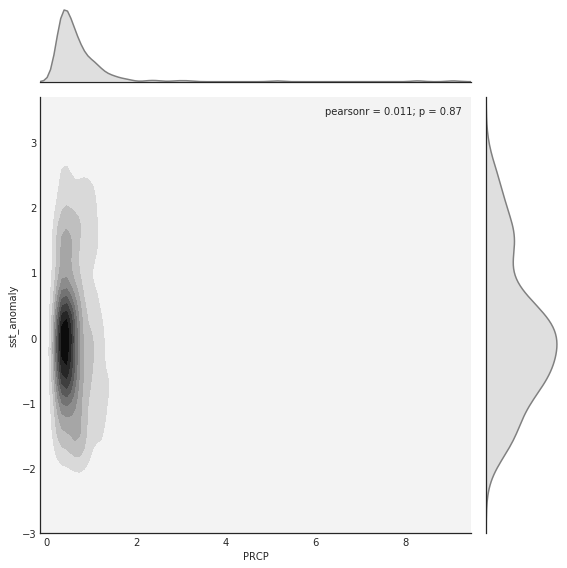

In [29]:
with sns.axes_style('white'):
    sns.jointplot('PRCP', 'sst_anomaly', data=df_lax_rain[df_lax_rain['PRCP']>0.25], 
                  kind='kde', size=8, color='grey');

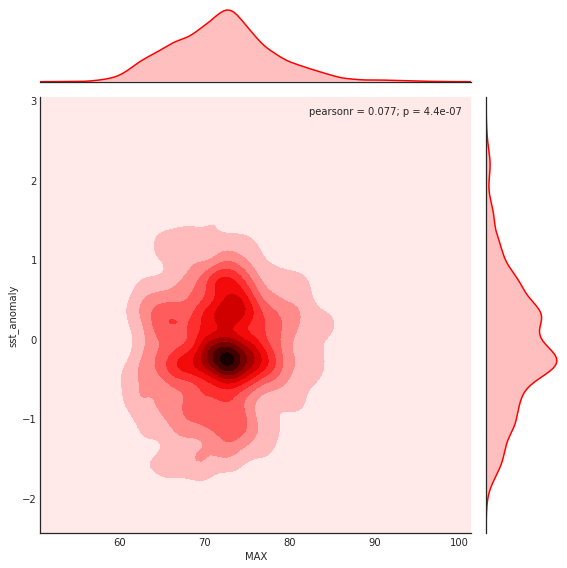

In [24]:
# Must use 3 month running averages to compare with SST data (also 3 month running avgs)

with sns.axes_style('white'):
    sns.jointplot('MAX', 'sst_anomaly', data=df_lax_fog, kind='kde', size=8, 
                  color='red');

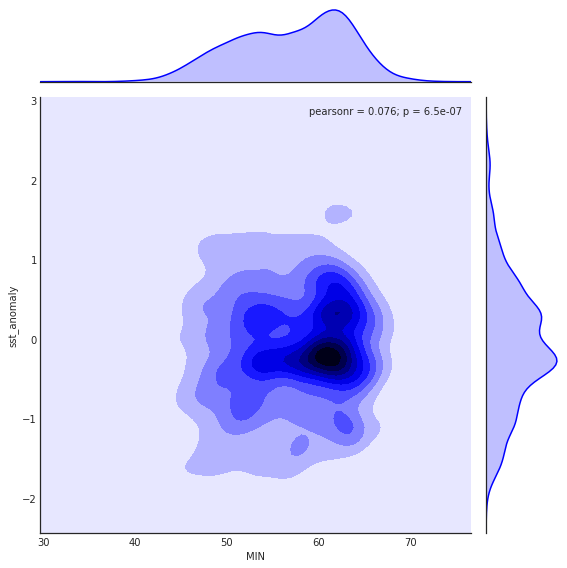

In [25]:
with sns.axes_style('white'):
    sns.jointplot('MIN', 'sst_anomaly', data=df_lax_fog, kind='kde', size=8, 
                  color='blue');

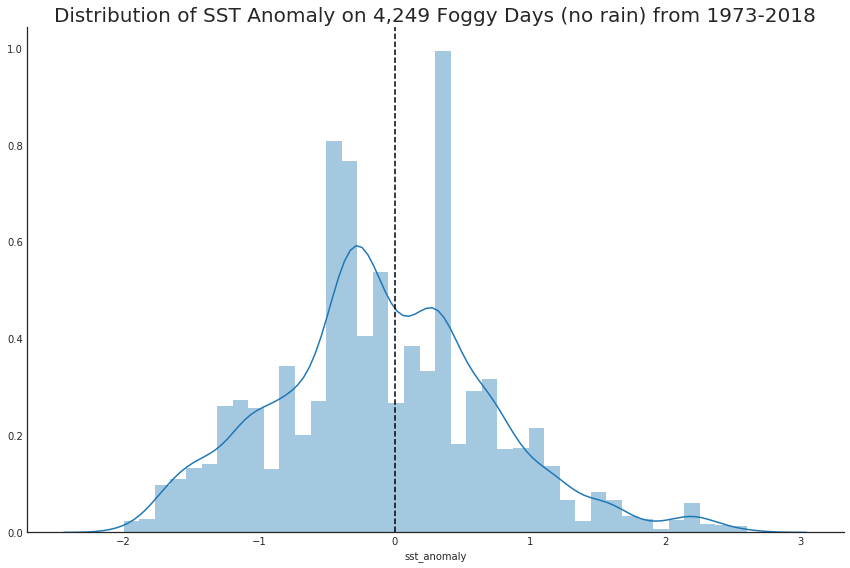

In [30]:
sns.set_style('white')
plt.figure(figsize=(12,8))

sns.distplot(df_lax_fog['sst_anomaly'].dropna(), bins=40)
plt.title("Distribution of SST Anomaly on 4,249 Foggy Days (no rain) from 1973-2018", 
          fontsize=20)

plt.axvline(0, color="k", linestyle="--");

sns.despine()
plt.tight_layout()
plt.tight_layout()

In [9]:
df_lax_fog.pivot_table(index='year', columns='month', aggfunc='mean')['sst_anomaly'].head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1973,1.8,1.2,0.5,-0.1,-0.5,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.0
1974,-1.8,-1.6,-1.2,-1.0,-0.9,-0.8,-0.5,NaN,-0.4,-0.6,-0.8,-0.6
1975,-0.5,-0.6,-0.7,NaN,-0.8,-1.0,-1.1,-1.2,-1.4,-1.4,-1.6,-1.7
1976,-1.6,-1.2,-0.7,-0.5,-0.3,0.0,0.2,0.4,0.6,0.8,0.9,NaN
1977,0.7,0.6,NaN,0.2,0.2,0.3,0.4,0.4,0.6,0.7,0.8,0.8


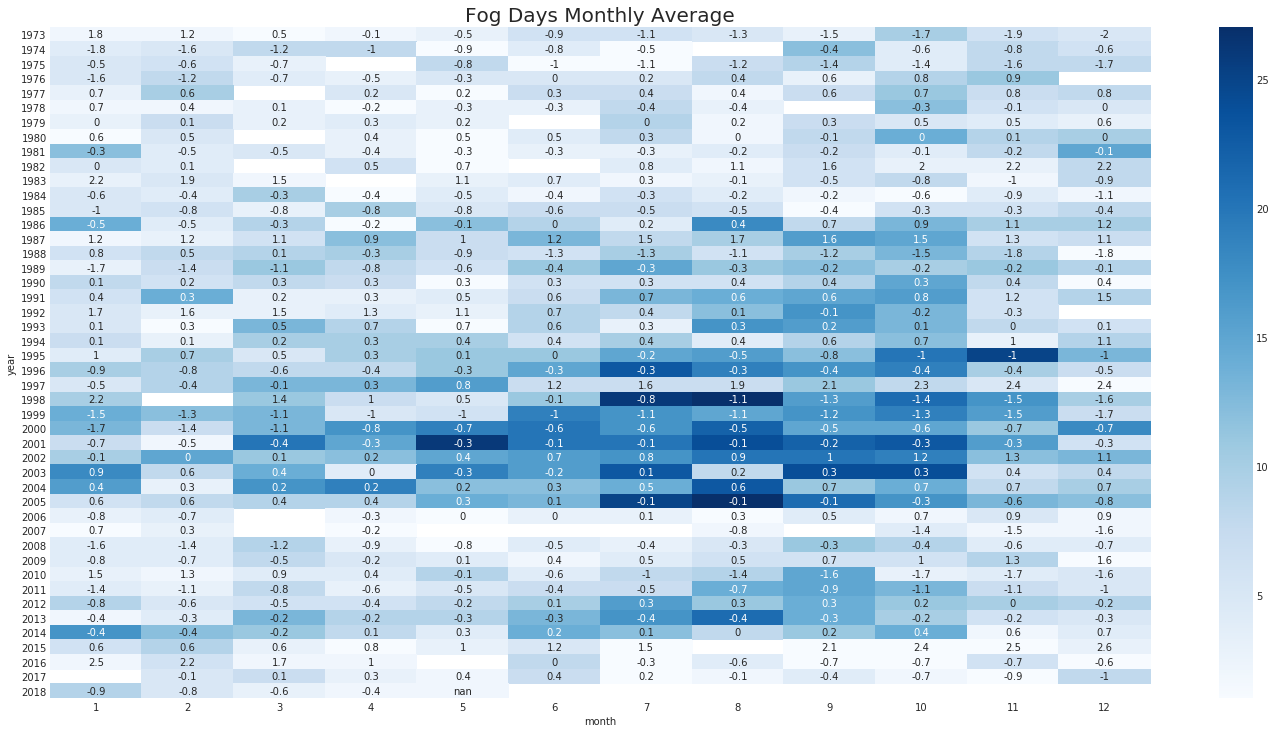

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.heatmap(df_lax_fog.pivot_table(index='year', columns='month', aggfunc='sum')['dummy'], 
           cmap='Blues', annot=df_enso_sst.loc[1973: 2018])

plt.tight_layout()
plt.title('Fog Days Monthly Average', fontsize=20);

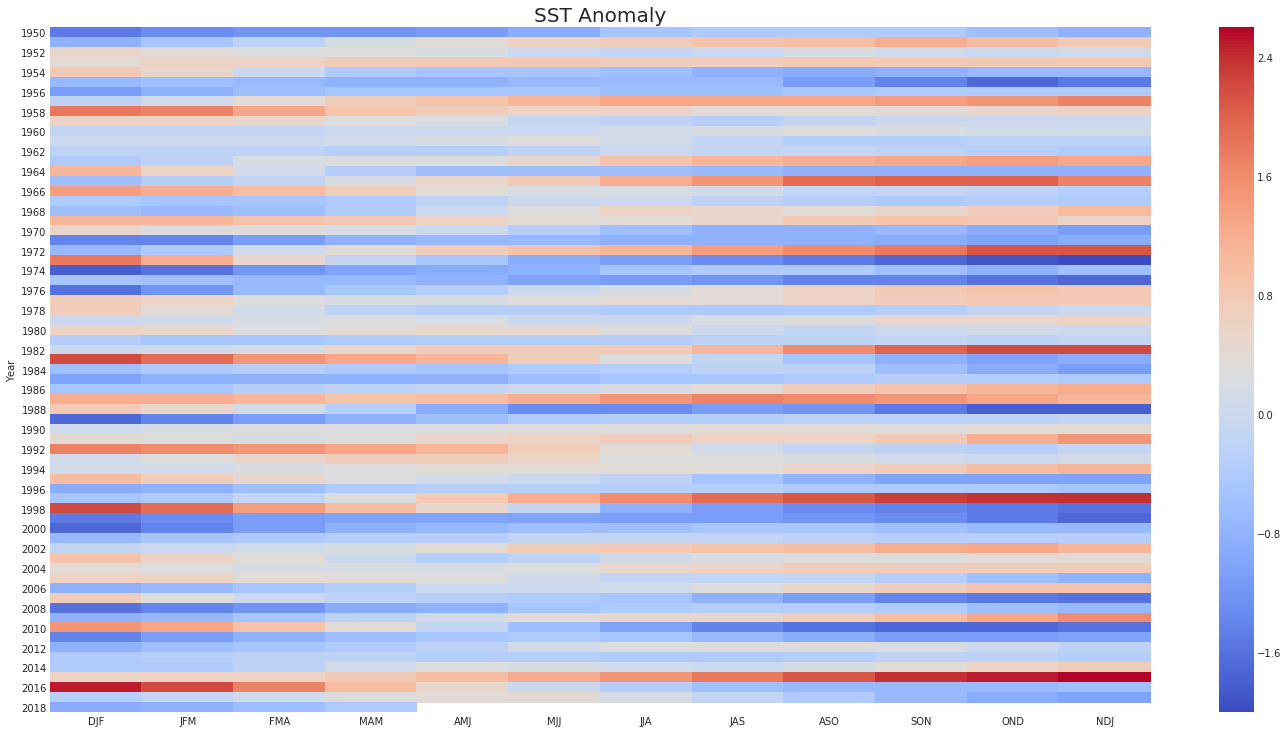

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.heatmap(df_enso_sst, cmap='coolwarm')

plt.tight_layout()
plt.title('SST Anomaly', fontsize=20);

In [36]:
df_enso_sst.plot(x="month", figsize=(20, 12))

KeyError: 'month'

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.factorplot(df_enso_sst.unstack())

plt.tight_layout()
plt.title('SST Anomaly', fontsize=20);

TypeError: object of type 'NoneType' has no len()

In [12]:
# SST Anomaly key, must pass on to weak el nino, strong el nino, etc. Or just find new data.
df_enso_sst.columns = list(range(1, 13))

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))

sns.jointplot(df_lax_fog.pivot_table(index='year', columns='month', aggfunc='sum')['dummy'], 
           color=['b', 'r'], y=df_enso_sst.loc[1973: 2018])

plt.tight_layout()
plt.title('Fog Days Monthly Average', fontsize=20);

ValueError: Invalid RGBA argument: ['b', 'r']